<a href="https://colab.research.google.com/github/sanjnapuri/Unit_3_Mini_Project/blob/main/Unit_3_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Environment Set Up**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
933493,2021-01-15,Sweetwater,Wyoming,56037.0,3262,26.0
933494,2021-01-15,Teton,Wyoming,56039.0,2605,4.0
933495,2021-01-15,Uinta,Wyoming,56041.0,1806,9.0
933496,2021-01-15,Washakie,Wyoming,56043.0,839,23.0


**Data Collection**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.head(20)


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


**Data Wrangling and EDA**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

df.drop(labels='fips', axis =1 , inplace = True )
df.drop(labels='county', axis =1 , inplace = True )
df = df.loc[df['state'].isin(['New York', 'Florida', 'Texas','Virginia', 'Ohio'])]

dec_data = df[(df['date'] >= '2020-12-01') & (df['date'] <= '2020-12-31')]
dec_data

,date,state,cases,deaths
784532,2020-12-01,Florida,12911,102.0
784533,2020-12-01,Florida,2046,32.0
784534,2020-12-01,Florida,8543,157.0
784535,2020-12-01,Florida,1417,19.0
784536,2020-12-01,Florida,15744,444.0
...,...,...,...,...
884623,2020-12-31,Virginia,358,8.0
884624,2020-12-31,Virginia,1649,10.0
884625,2020-12-31,Virginia,2023,58.0
884626,2020-12-31,Virginia,1311,28.0


**Understand NY Covid 19 data in last 30 days**

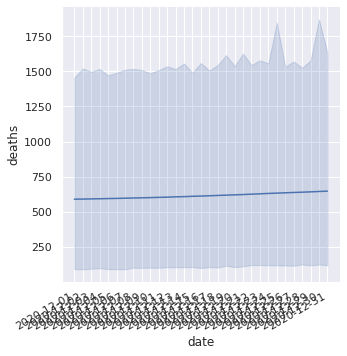

In [99]:
dec_NY = dec_data.query('state == "New York"')
dec_NY = dec_NY.set_index("date")
dec_NY.head()

plot = sns.relplot(x = "date", y = "deaths", kind = "line",data = dec_NY)
plot.fig.autofmt_xdate()

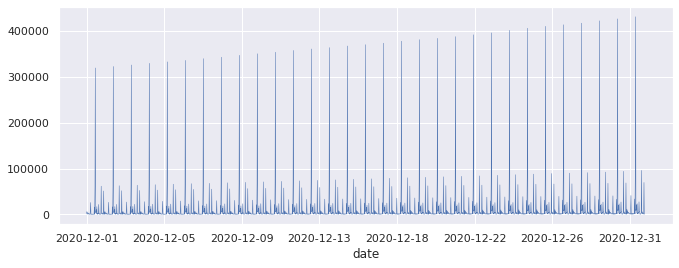

In [98]:
sns.set(rc={'figure.figsize':(11, 4)})
dec_NY['cases'].plot(linewidth=0.5)

Deaths and cases increased in December in New York

**Comparing Covid 19 data with different states**

AxesSubplot(0.125,0.125;0.775x0.755)


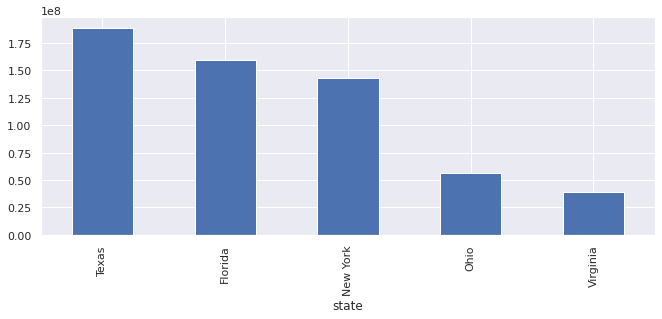

In [91]:
df
print(df.groupby(['state'])['cases'].sum().sort_values(ascending = False).plot(kind='bar'))

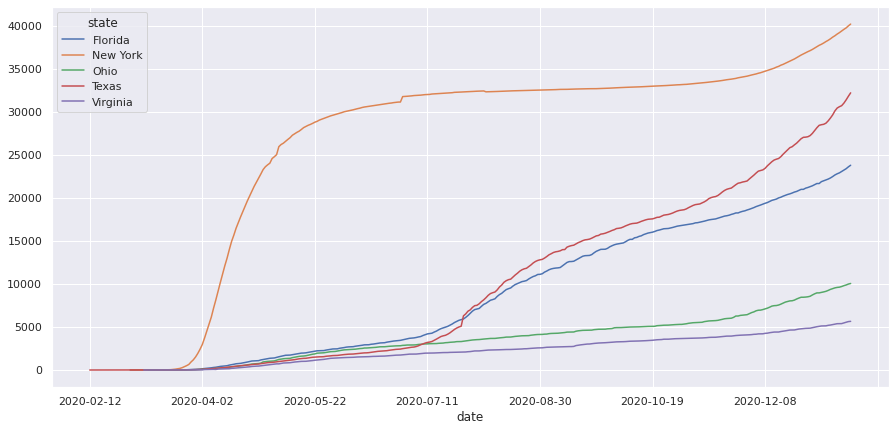

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['date','state']).sum()['deaths'].unstack().plot(ax=ax)

**Conclusion**

By looking at the comparisons between number of cases in each state and the number of deaths. You can see that while Texas leads in number of cases, New York has many more deaths. 